In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, AncillaRegister, IBMQ, Aer
from qiskit.circuit.library import QFT, GraphState, GroverOperator
from qiskit.qasm import pi

import numpy as np
import matplotlib.pyplot as plt

from src.utils import *
from src.benchmarks import grover, qaoa, ghz, qft, qft_entangled, shor, w_state, qpe_inexact, qpe_exact, graph_state, vqe, deutsch_jozsa, hhl, ae

In [2]:
provider = IBMQ.load_account()
backend = provider.backend.ibmq_santiago
c_map = backend.configuration().coupling_map



from qiskit.test.mock import FakeMontreal
fake_backend = FakeMontreal()
c_map = fake_backend.configuration().coupling_map

max_n_arch = max(max(c_map))

In [3]:
basis_gates = backend.configuration().basis_gates
basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

In [4]:
benchmarks = [grover, qaoa, ghz, qft, qft_entangled, w_state, qpe_inexact, qpe_exact, vqe, deutsch_jozsa, hhl, shor]

In [5]:
n_min = 3
n_max = 5
opt_level = 2
num_qubits_test = 5
print_hist = True
simulator = Aer.get_backend('qasm_simulator')

In [9]:
characteristics = []

for benchmark in benchmarks:
    if benchmark == shor or benchmark == (hhl):
        continue
    for n in range(n_min, n_max):  
        qc = benchmark.create_circuit(n)
        serialize_qc(qc, n)  
        
        compiled_without_architecure = get_compiled_circuit(qc = qc, opt_level=opt_level, basis_gates=basis_gates)
        save_as_qasm(compiled_without_architecure, n)       
        
        filename = qc.name + "_transpiled_" + str(n) 
        depth = compiled_without_architecure.depth()
        
        characteristics.append([filename, n, depth])    
        
        if print_hist:
            sim_and_print_hist(compiled_without_architecure, simulator, filename)
        
        if (len(compiled_without_architecure.qubits) < max_n_arch):
            compiled_with_architecture = get_compiled_circuit(qc = qc, opt_level=opt_level, 
                                                              basis_gates=basis_gates, c_map=c_map)
            save_as_qasm(compiled_with_architecture, n, True)
            
            filename = qc.name + "_transpiled_mapped_" + str(n)
            depth = compiled_with_architecture.depth()
            characteristics.append([filename, n, depth])

            if print_hist:
                sim_and_print_hist(compiled_with_architecture, simulator, filename)

create_shor_benchmarks()
create_hhl_benchmarks()

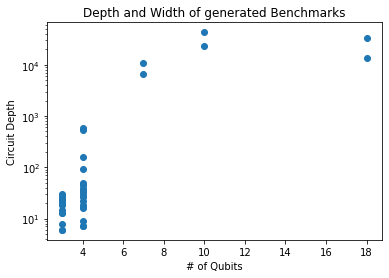

In [10]:
characteristics = np.array(characteristics)
plt.scatter(x=characteristics[:,1].astype(int), y=characteristics[:,2].astype(int))
plt.yscale('log')
plt.title('Depth and Width of generated Benchmarks')
plt.xlabel('# of Qubits')
plt.ylabel('Circuit Depth');

In [7]:
def create_shor_benchmarks():
    small = [15,4] #18 qubits
    medium = [821, 4] #42 qubits
    large = [11777, 4] #58 qubits
    xlarge = [201209, 4] # 74 qubits
    benchmark_list = [small]#, medium, large, xlarge]
    for n, a in benchmark_list:         
        qc = shor.create_circuit(n,a)
        num_qubits = len(qc.qubits)
        
        serialize_qc(qc, num_qubits) 
        
        compiled_without_architecure = get_compiled_circuit(qc = qc, opt_level=opt_level, basis_gates=basis_gates)
        num_qubits = len(compiled_without_architecure.qubits)
        save_as_qasm(compiled_without_architecure, num_qubits)
        
        filename = qc.name + "_transpiled_" + str(num_qubits)
        depth = compiled_without_architecure.depth()        
        characteristics.append([filename, num_qubits, depth])
        
        if print_hist:
            sim_and_print_hist(compiled_without_architecure, simulator, filename)
        
        if (num_qubits < max_n_arch):
            compiled_with_architecture = get_compiled_circuit(qc = qc, opt_level=opt_level, 
                                                              basis_gates=basis_gates, c_map=c_map)
            save_as_qasm(compiled_with_architecture, num_qubits, True)
            
            filename = qc.name + "_transpiled_mapped_" + str(num_qubits)
            depth = compiled_with_architecture.depth()
            characteristics.append([filename, num_qubits, depth])
            
            if print_hist:
                sim_and_print_hist(compiled_with_architecture, simulator, filename)

In [8]:
def create_hhl_benchmarks():
    # n is not the number of qubits in this case
    for n in range(1,4):         
        qc = hhl.create_circuit(n)
        
        num_qubits = len(qc.qubits)
        
        serialize_qc(qc, num_qubits) 
        compiled_without_architecure = get_compiled_circuit(qc = qc, opt_level=opt_level, basis_gates=basis_gates)
        num_qubits = len(compiled_without_architecure.qubits)
        save_as_qasm(compiled_without_architecure, num_qubits)        
        
        filename = qc.name + "_transpiled_" + str(num_qubits)
        depth = compiled_without_architecure.depth()        
        characteristics.append([filename, num_qubits, depth])
        
        if print_hist:
            sim_and_print_hist(compiled_without_architecure, simulator, filename)
        
        if (num_qubits < max_n_arch):
            compiled_with_architecture = get_compiled_circuit(qc = qc, opt_level=opt_level, 
                                                              basis_gates=basis_gates, c_map=c_map)
            save_as_qasm(compiled_with_architecture, num_qubits, True)
            
            filename = qc.name + "_transpiled_mapped_" + str(num_qubits)
            depth = compiled_with_architecture.depth()
            characteristics.append([filename, num_qubits, depth])
            
            if print_hist:
                sim_and_print_hist(compiled_with_architecture, simulator, filename)

Grover Test

In [ ]:
a = grover.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

QAOA Test

In [ ]:
a = qaoa.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

GHZ Test

In [ ]:
a = ghz.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

QFT Test

In [ ]:
a = qft.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

QFT Entangled Test

In [ ]:
a = qft_entangled.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

W-State Test

In [ ]:
a = w_state.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

QPE Exact and QPE Inexact Test

In [ ]:
a = qpe_exact.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

a = qpe_inexact.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

Graph State Test

In [ ]:
a = graph_state.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)


In [ ]:
b.count_ops()

Shor Test

In [ ]:
a = shor.create_circuit(15)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, None)
#c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
#save_as_qasm(c, None, True)

AE Test

In [ ]:
a = ae.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

DJ Test

In [ ]:
num_qubits_test = 5
a = deutsch_jozsa.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, num_qubits_test)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, num_qubits_test, True)

In [ ]:
from qiskit.circuit import qpy_serialization
with open('test_dj.qpy', 'wb') as fd:
    qpy_serialization.dump(a, fd)

In [ ]:
with open('test_dj.qpy', 'rb') as fd:
    new_qc = qpy_serialization.load(fd)[0]
new_qc.draw()

HHL Test

In [ ]:
import src.benchmarks.hhl
num_qubits_test = 3
a = hhl.create_circuit(num_qubits_test)
b = get_compiled_circuit(a, opt_level=2)
save_as_qasm(b, 2)
c = get_compiled_circuit(b, opt_level=2, c_map=c_map)
save_as_qasm(c, 2, True)

Test allgemein

In [ ]:
from qiskit.test.mock import FakeMontreal
fake_backend = FakeMontreal()
fake_backend.configuration().coupling_map